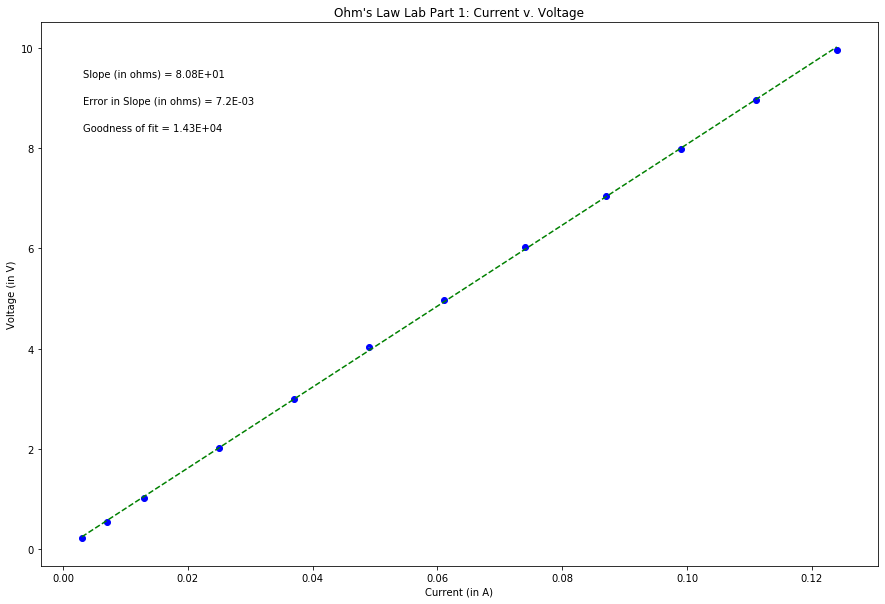

In [2]:
#####################################
#IMPORTS

import numpy as np
import matplotlib.pyplot as plt

#####################################
#DATA

V_voltage = [0.22,0.546,1.026,2.01,2.995,4.023,4.974,6.027,7.05,7.98,
             8.96,9.96]                                                  #in V
i_current = [0.003,0.007,0.013,0.025,0.037,0.049,0.061,0.074,0.087,0.099,
             0.111, 0.124]                                               #in A


unc_V =[]
i=0
while i <len(V_voltage):
    unc_V.append(0.001)
    i+=1


#-----------------------------------------------#
#--------------PLOTTING CODE BELOW--------------#
#-----------------------------------------------#

xvariable = np.array(i_current)
yvariable = np.array(V_voltage)
err_yvariable = np.array(unc_V)

#--------------------------------------------#

x = xvariable  
y = yvariable
dy = err_yvariable  

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 

def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, 
#error in slope and goodness of fit on the plot using "annotate"

plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels
plt.xlabel('Current (in A)')
plt.ylabel('Voltage (in V)')
plt.title("Ohm's Law Lab Part 1: Current v. Voltage")
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope (in ohms) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (in ohms) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()